## Proyecto \#1

### Statistical Learning  (2022)

Integrantes:
* Belter Molina Guevara
* Esvin Molina Guevara

---

Importamos las librearías a utilizar:

In [24]:
# Importamos las librearías a utilizar
import pandas as pd
import numpy as np
import seaborn as sns

Cargamos los datos y los convertimos a DataFrame:

In [3]:
# Cargamos los datos
data = np.load('data/proyecto_training_data.npy')

# Convertimos a DataFrame los datos para trabajar de una manera mas cómoda
dataset = pd.DataFrame(
                data,
                columns=['SalePrice','OverallQual','1stFlrSF','TotRmsAbvGrd','YearBuilt','LotFrontage']
             )

# Mostramos las primeras cinco lineas del dataset
dataset.head()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0


---
2. Hacemos el slicing de los datos para entrenamiento y pruebas:

In [5]:
# Hacemos el slicing de los datos
# training_data = 80%
# testing_data = 20%


# Training data 
training_data = dataset.copy()

---
3. Análisis exploratorio de datos: Para cada variable en el data set calcular:
* media
* valor máximo
* valor mínimo
* rango (peak to peak, no el rango del tensor que por ser vector se sabe que es 1)
* desviación estándar

In [50]:
# Análisis exploratorio de los datos
df = training_data.copy()

for col in df.columns:
    media = np.mean(df[col])
    maximo = np.max(df[col])
    minimo = np.min(df[col])
    desviacion_est = np.std(df[col])
    rango = np.ptp(df[col])

    print(f'Variable {col}:')
    print(f'   media: {media}')
    print(f'   valor máximo: {maximo}')
    print(f'   valor mínimo:{minimo}')
    print(f'   rango: {rango}')
    print(f'   desviación estándar: {desviacion_est}')

Variable SalePrice:
   media: 180921.19589041095
   valor máximo: 755000.0
   valor mínimo:34900.0
   rango: 720100.0
   desviación estándar: 79415.29188606751
Variable OverallQual:
   media: 6.0993150684931505
   valor máximo: 10.0
   valor mínimo:1.0
   rango: 9.0
   desviación estándar: 1.3825228366585953
Variable 1stFlrSF:
   media: 1162.626712328767
   valor máximo: 4692.0
   valor mínimo:334.0
   rango: 4358.0
   desviación estándar: 386.45532230228963
Variable TotRmsAbvGrd:
   media: 6.517808219178082
   valor máximo: 14.0
   valor mínimo:2.0
   rango: 12.0
   desviación estándar: 1.624836553698191
Variable YearBuilt:
   media: 1971.267808219178
   valor máximo: 2010.0
   valor mínimo:1872.0
   rango: 138.0
   desviación estándar: 30.192558810489448
Variable LotFrontage:
   media: 70.04995836802665
   valor máximo: 313.0
   valor mínimo:21.0
   rango: nan
   desviación estándar: 24.27463944767604


---
4. Para cada variable en el dataset, crear un histograma

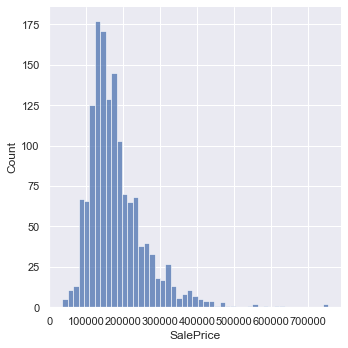

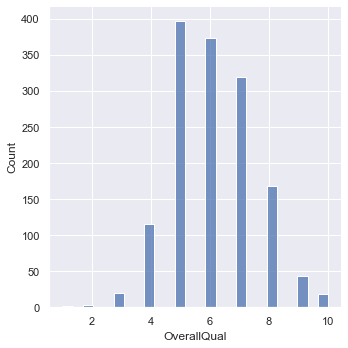

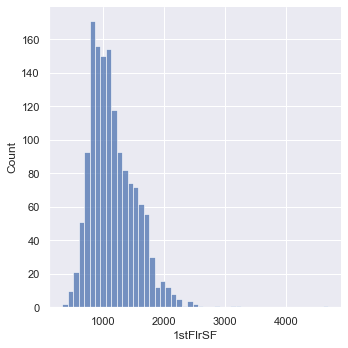

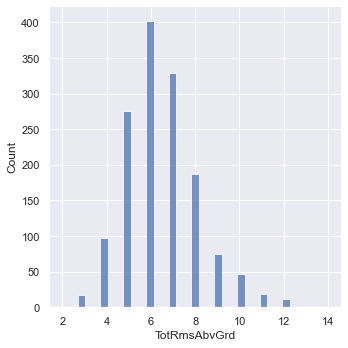

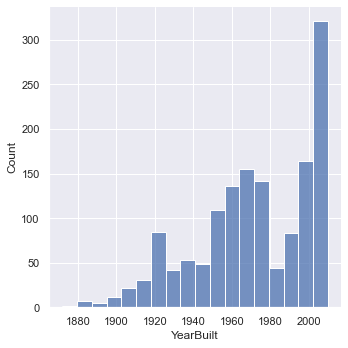

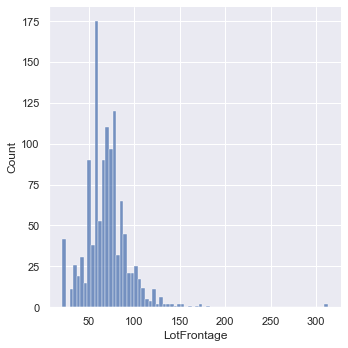

In [48]:
# Gráficos - Histograma para cada variable 
df = training_data.copy()

sns.set_theme()
for col in df.columns:
    sns.displot(df[col])  

---
5. Elegimos las dos variables con mayor potencial predictivo para la variable dependiente:

In [3]:
# Elegir las dos variables con mayor potencial predictivo para la variable dependiente

# Calculamos el coeficiente de correlación
def calcCorrCoef(df, target):
    #X = df.copy()
    #X.drop(target, inplace=True)    
    #for col in X.columns:
    for col in df.columns:
        print('Correlación - ' + col + ':',
            #X[target].corr(X[col], method='pearson'))
            df[target].corr(df[col], method='pearson'))

calcCorrCoef(dataset, 'SalePrice')            

# Basados en los gráficos y los coeficientes de correlación , las dos variables con mayor potencial predictivo para la columna target son:
# 1. OverallQual, con una correlación 0.7909816005838053
# 2. 1stFlrSF, con una correlación 0.6058521846919145

Correlación - SalePrice: 0.9999999999999998
Correlación - OverallQual: 0.7909816005838053
Correlación - 1stFlrSF: 0.6058521846919145
Correlación - TotRmsAbvGrd: 0.5337231555820281
Correlación - YearBuilt: 0.5228973328794968
Correlación - LotFrontage: 0.351799096570678


---
6. Crear función para entrenar un modelo de regresión lineal de una variable:

In [32]:
# parámetros de la función:
X = dataset['OverallQual']
y = dataset['SalePrice']
epochs = 500 # cantidad de repeticiones que va a realizar el algoritmo
imprimir_error_cada = 20 
learning_rate = 0.001  #

# cuerpo de la función:

# 7.1 crear una matriz de 2 columnas, la primera columna corresponde al vector de datos x y la segunda columna es igual a 1 para todas las filas
unos = np.ones(np.shape(X)).reshape(-1,1)   
X = X.to_numpy().reshape(-1,1)
A = np.hstack([X,unos])
errores = []

# 7.2 inicializar los parámetros del modelo en un vector B1 y B0
b0 = 10
b1 = 20

# 7.3 Por cada epoch debemos 
for i in range(epochs):
    # calculamos los Betas
    betas = np.array([b1,b0]).reshape(-1,1)

    # calcular el 'y' estimado de todas las observaciones de manera simultanea.  Es decir, evaluamos el modelo con los betas.
    yEstimado = np.matmul(A, betas)
    
    # calcular el gradiente del error respecto de cada parámetro beta
    gradienteB0 = np.mean(yEstimado - y.to_numpy())
    gradienteB1 = np.mean((yEstimado - y.to_numpy()) * X)

    # actualizamos los parámetros del modelo
    b0 = b0 - learning_rate*gradienteB0
    b1 = b1 - learning_rate*gradienteB1

    if ( (i % imprimir_error_cada) == 0):
        errores.append(np.mean((yEstimado - y.to_numpy())**2) * 1/2)
        

In [29]:
type(X)

numpy.ndarray

In [31]:
print(b0)
print(b1)
print(errores)

8475.01210217937
26924.23731160438
[19495763826.86365, 10791940836.151749, 6949655450.876929, 5253260186.73151, 4504064313.733271, 4172964008.5743423, 4026412077.5683727, 3961320451.0689616, 3932185905.5795994, 3918923252.030499, 3912666858.532774, 3909503421.9742594, 3907705604.3321257, 3906510955.7378345, 3905582929.3508444, 3904772972.543892, 3904015513.6078715, 3903281608.7313786, 3902558481.7104025, 3901840492.7465997, 3901125152.061744, 3900411360.3014045, 3899698631.846574, 3898986751.982278, 3898275625.571339, 3897565210.258734, 3896855486.987886, 3896146446.9865546, 3895438086.022346, 3894730401.8671217, 3894023393.1777472, 3893317059.002091, 3892611398.560941, 3891906411.1517644, 3891202096.106205, 3890498452.771353, 3889795480.501434, 3889093178.6541824, 3888391546.5892124, 3887690583.667318, 3886990289.250132, 3886290662.7000365, 3885591703.3800416, 3884893410.653793, 3884195783.8855653, 3883498822.440232, 3882802525.6832714, 3882106892.9807806, 3881411923.6994534, 38807176